In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [15]:
# Read the first data source
df1 = pd.read_excel('C:/Users/15039/OneDrive/Desktop/5310/assignments/BIDSSAssignments/BIDSS-Assignment04-Data/Electric_Vehicle_Population_Data.xlsx')

In [16]:
# Drop unnecessary columns from the first data source
df1 = df1[['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
           'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
           'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
           'Vehicle Location', 'Electric Utility', '2020 Census Tract']]

In [17]:
# Read the second data source
df2 = pd.read_excel('C:/Users/15039/OneDrive/Desktop/5310/assignments/BIDSSAssignments/BIDSS-Assignment04-Data/Electric_Vehicle_Population_Size_History_By_County.xlsx')

In [18]:
#Drop unnecessary columns from the second data source
df2 = df2[['Date', 'County', 'State', 'Vehicle Primary Use', 'Battery Electric Vehicles (BEVs)',
           'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total',
           'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles']]

In [13]:
# Remove rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [19]:
# Data Integration
merged_df = pd.merge(df1, df2, on=['County', 'State'], how='inner')

In [20]:
# Exploratory Data Analysis (EDA), Summary statistics
summary_stats = merged_df.describe()
print(summary_stats)

        Postal Code    Model Year  Electric Range     Base MSRP  \
count  2.076524e+07  2.076524e+07    2.076509e+07  2.076509e+07   
mean   9.822621e+04  2.019663e+03    7.459383e+01  1.448512e+03   
std    1.537726e+03  3.001966e+00    9.873984e+01  9.682758e+03   
min    1.730000e+03  1.997000e+03    0.000000e+00  0.000000e+00   
25%    9.805200e+04  2.018000e+03    0.000000e+00  0.000000e+00   
50%    9.812200e+04  2.021000e+03    2.100000e+01  0.000000e+00   
75%    9.837000e+04  2.022000e+03    1.500000e+02  0.000000e+00   
max    9.970100e+04  2.024000e+03    3.370000e+02  8.450000e+05   

       Legislative District  DOL Vehicle ID  2020 Census Tract  \
count          2.074780e+07    2.076524e+07       2.076524e+07   
mean           2.950438e+01    2.063565e+08       5.301343e+10   
std            1.478373e+01    8.583122e+07       1.030892e+09   
min            1.000000e+00    4.385000e+03       1.081042e+09   
25%            1.800000e+01    1.606752e+08       5.303301e+10   


C:\Users\15039\AppData\Local\Temp\ipykernel_22892\3232649690.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


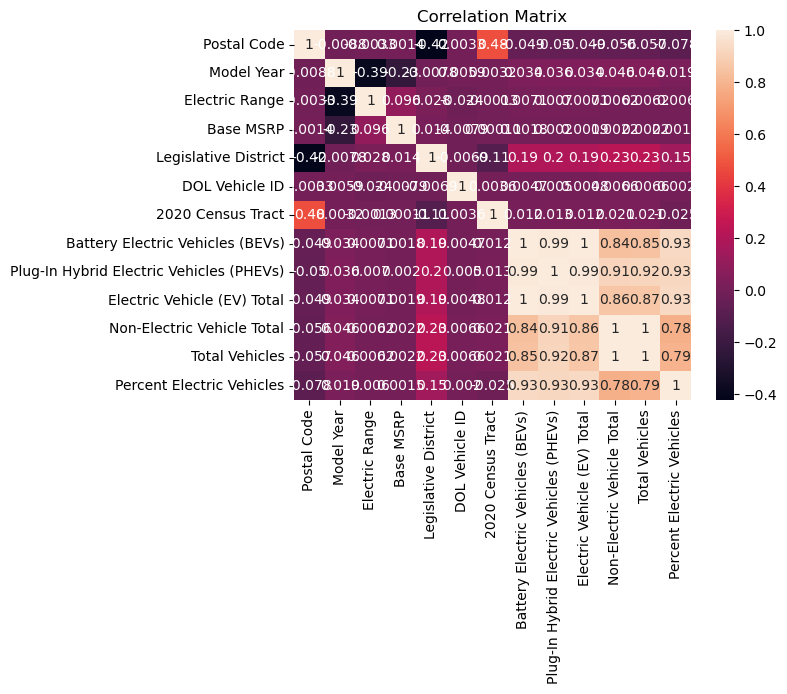

In [21]:
# Correlation analysis
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Feature Engineering
# Example: Create a new feature 'Electric Vehicle Percentage'
merged_df['Electric Vehicle Percentage'] = merged_df['Electric Vehicle (EV) Total'] / merged_df['Total Vehicles']

In [23]:
# Hypothesis Testing and Statistical Analysis
# Example: Compare the mean electric range between different makes of electric vehicles
make_groups = merged_df.groupby('Make')
make_means = make_groups['Electric Range'].mean()

make1 = merged_df.loc[merged_df['Make'] == 'Make1', 'Electric Range']
make2 = merged_df.loc[merged_df['Make'] == 'Make2', 'Electric Range']

t_stat, p_value = ttest_ind(make1, make2)
print(f"T-Statistic: {t_stat}, p-value: {p_value}")

T-Statistic: nan, p-value: nan


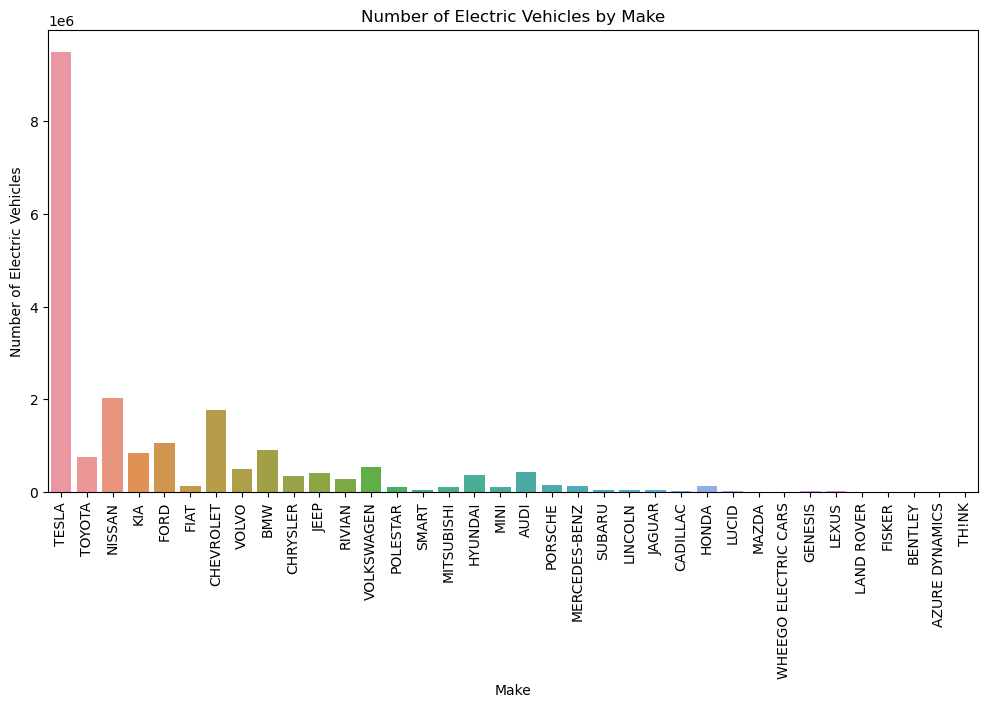

In [24]:
# Data Visualization
# Example: Bar plot of the number of electric vehicles by make
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Make')
plt.xlabel('Make')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Make')
plt.xticks(rotation=90)
plt.show()

In [32]:
# EV Distribution by Make
make_distribution = merged_df['Make'].value_counts()
print("EV Distribution by Make:")
print(make_distribution)
print()

EV Distribution by Make:
TESLA                   9503075
NISSAN                  2023871
CHEVROLET               1759609
FORD                    1060132
BMW                      906416
KIA                      844748
TOYOTA                   749635
VOLKSWAGEN               542155
VOLVO                    495351
AUDI                     419240
JEEP                     401896
HYUNDAI                  368344
CHRYSLER                 343067
RIVIAN                   278010
PORSCHE                  146608
FIAT                     124278
HONDA                    121131
MERCEDES-BENZ            119658
MITSUBISHI               115115
MINI                     114268
POLESTAR                 101223
SMART                     42658
SUBARU                    41888
JAGUAR                    34188
LINCOLN                   32523
LUCID                     21714
CADILLAC                  18329
LEXUS                     12320
GENESIS                   10318
LAND ROVER                 6545
FISKER         

In [33]:
# EV Adoption Rates by State
state_adoption_rates = merged_df.groupby('State')['Electric Vehicle (EV) Total'].sum() / merged_df.groupby('State')['Total Vehicles'].sum()
print("EV Adoption Rates by State:")
print(state_adoption_rates)
print()

EV Adoption Rates by State:
State
AK    0.011744
AL    0.031194
AR    0.093750
AZ    0.006242
CA    0.007879
CO    0.005051
CT    0.015221
DC    0.017800
DE    0.021944
FL    0.022593
GA    0.015387
HI    0.010869
ID    0.010631
IL    0.009567
IN    0.072022
KS    0.013430
KY    0.190635
LA    0.057522
MA    0.019568
MD    0.011241
MI    1.000000
MN    0.029220
MO    0.027847
MS    0.026294
MT    0.051672
NC    0.006660
NE    0.032103
NH    0.045455
NJ    0.039666
NM    0.117647
NV    0.007399
NY    0.013769
OH    0.047059
OK    0.025522
OR    0.009527
PA    0.027638
RI    0.011193
SC    0.019145
TN    0.005560
TX    0.008729
UT    0.012780
VA    0.009548
WA    0.018621
WY    0.157895
dtype: float64



In [34]:
# Demographic Factors
# Example: Mean Electric Range by County
county_mean_range = merged_df.groupby('County')['Electric Range'].mean()
print("Mean Electric Range by County:")
print(county_mean_range)
print()

Mean Electric Range by County:
County
Adams            82.972264
Alameda          73.333333
Alexandria       77.000000
Allen           210.000000
Anne Arundel     32.818182
                   ...    
Whitman          62.982609
Wichita         207.500000
Yakima           70.453061
Yavapai         220.000000
Yellowstone      22.000000
Name: Electric Range, Length: 168, dtype: float64



In [35]:
# Example: Mean Electric Vehicle Percentage by Legislative District
legislative_district_mean_percentage = merged_df.groupby('Legislative District')['Electric Vehicle Percentage'].mean()
print("Mean Electric Vehicle Percentage by Legislative District:")
print(legislative_district_mean_percentage)
print()

Mean Electric Vehicle Percentage by Legislative District:
Legislative District
1.0     0.008049
2.0     0.004554
3.0     0.002185
4.0     0.002185
5.0     0.012053
6.0     0.002185
7.0     0.001735
8.0     0.002768
9.0     0.001648
10.0    0.005472
11.0    0.012053
12.0    0.002714
13.0    0.002131
14.0    0.002470
15.0    0.000921
16.0    0.002272
17.0    0.005446
18.0    0.005446
19.0    0.002194
20.0    0.003011
21.0    0.006268
22.0    0.005097
23.0    0.006056
24.0    0.005606
25.0    0.004137
26.0    0.004773
27.0    0.004137
28.0    0.004137
29.0    0.004137
30.0    0.011777
31.0    0.005946
32.0    0.009714
33.0    0.012053
34.0    0.012053
35.0    0.004739
36.0    0.012053
37.0    0.012053
38.0    0.006268
39.0    0.006060
40.0    0.007267
41.0    0.012053
42.0    0.005478
43.0    0.012053
44.0    0.006268
45.0    0.012053
46.0    0.012053
47.0    0.012053
48.0    0.012053
49.0    0.005446
Name: Electric Vehicle Percentage, dtype: float64

